In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

os.chdir("/content/drive/My Drive/Colab Notebooks/")
sys.path.append("/content/drive/My Drive/Colab Notebooks/")

Mounted at /content/drive


In [ ]:
# Install necessary libraries
!pip install pandas spacy nltk scikit-learn matplotlib seaborn -q

In [ ]:
# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import re

In [ ]:
job_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/job_dataset.csv')


In [ ]:
resume_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/clean_resume_data.csv')

In [ ]:
  # Step 4: Data preprocessing
def preprocess_text_simple(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    return text

resume_data['Feature'] = resume_data['Feature'].apply(preprocess_text_simple)
job_data['Features'] = job_data['Features'].apply(preprocess_text_simple)

In [ ]:
# Step 5: Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(resume_data['Feature'])
y = resume_data['Category']

In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Save the model
with open('resume_categorization_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# Download the model file
from google.colab import files
files.download('resume_categorization_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 7: Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.56      0.63      0.59        30
           2       1.00      0.12      0.22         8
           3       0.56      0.45      0.50        20
           4       0.15      0.17      0.16        18
           5       1.00      0.17      0.29         6
           6       0.78      0.86      0.82        21
           7       0.73      0.70      0.71        23
           8       0.00      0.00      0.00         2
           9       0.89      0.59      0.71        27
          10       0.85      0.71      0.77        24
          11       0.90      0.76      0.83        34
          12       0.45      0.25      0.32        20
          13       0.71      0.79      0.75        19
          14       0.94      0.68      0.79        25
          15       0.52      0.67      0.58        21
          16       0.62      0.68      0.65        19
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


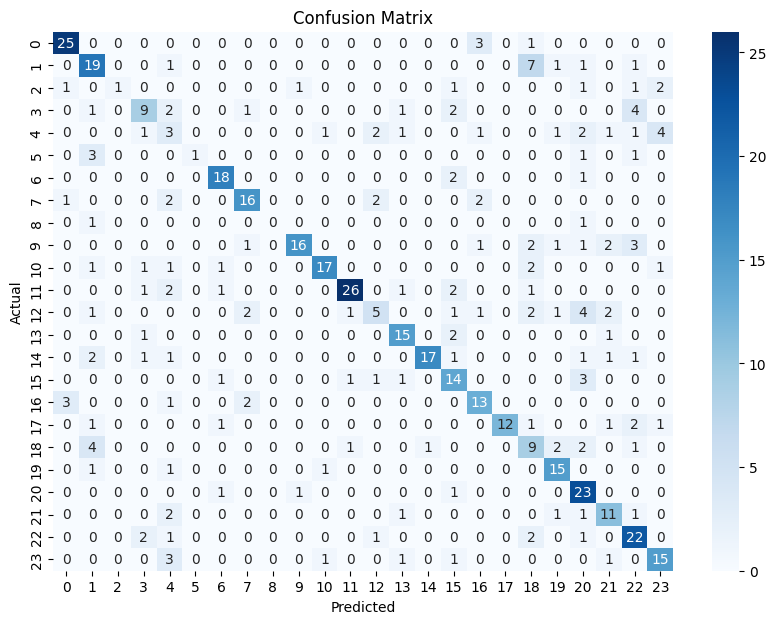

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

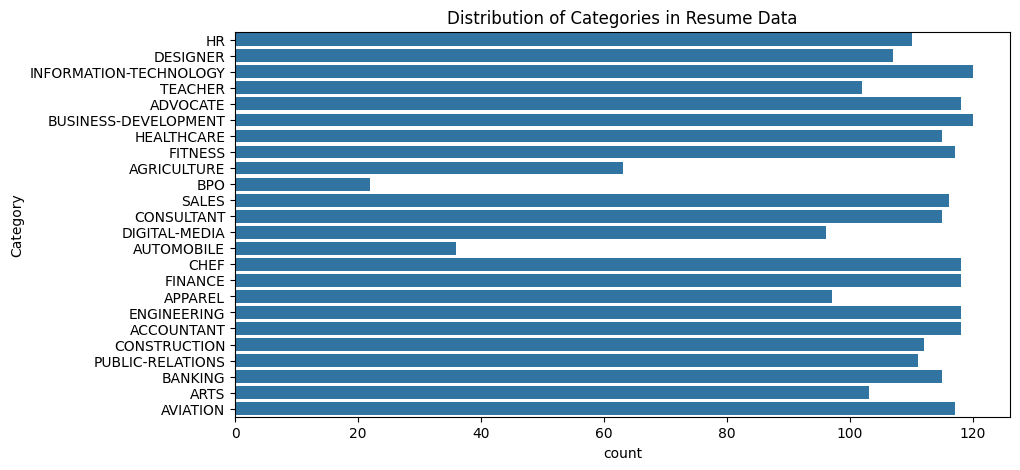

In [ ]:
# Step 8: Visualizations
# Distribution of Categories
plt.figure(figsize=(10,5))
sns.countplot(y)
plt.title('Distribution of Categories in Resume Data')
plt.show()

In [ ]:

# Most important features
feature_names = vectorizer.get_feature_names_out()
sorted_coef_index = model.coef_[0].argsort()
print("Top 10 important features:")
for i in sorted_coef_index[-10:]:
    print(f"{feature_names[i]}: {model.coef_[0][i]}")

Top 10 important features:
balance: 1.0104878020793089
reconciliations: 1.09350815868026
ledger: 1.1535559703874507
payroll: 1.2636428031411513
entries: 1.2900236113795855
tax: 1.3002383916377664
accounts: 1.7765145357891483
financial: 1.9052243010263366
accounting: 4.115745213809593
accountant: 4.242839230994712


In [ ]:
import pickle

# Save the model
with open('resume_categorization_model.pkl', 'wb') as file:
    pickle.dump(model, file)
